3D plots might make our solutions easier to visualise. Explore a few plotting routines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import plotly.graph_objects as go

from functions import *

Run the numerical method once just to have some data

In [2]:
Nt_gaps = 10000    # number of timesteps
T = 60             # final time 

Nx_spaces = 1000;   # number of spaces in x
L1 = -10; # Distance behind 0 reference point
L2 = 25 # Distance in front  0 reference point

Cf, U, x, t = forward_euler(Nt_gaps, Nx_spaces, L1, L2, C0=8.73e-3, T=60, D=0.1, v=0.2, b0=0, bL=0, x_heart=13)

Delta x = 0.035
Delta t = 0.006
C = 0.4898
A = 0.0171


In [3]:
print(U.shape)
print(x.shape)


(1001, 10001)
(1001,)


matplotlib

In [4]:
# Need to a bit of indexing to get a proper surface to plot
xmin = 0
xmax = 15

xmin_idx = (np.abs(x - xmin)).argmin()
xmax_idx = (np.abs(x - xmax)).argmin()

xx = x[xmin_idx : xmax_idx+1]
uu = U[xmin_idx : xmax_idx+1, :]

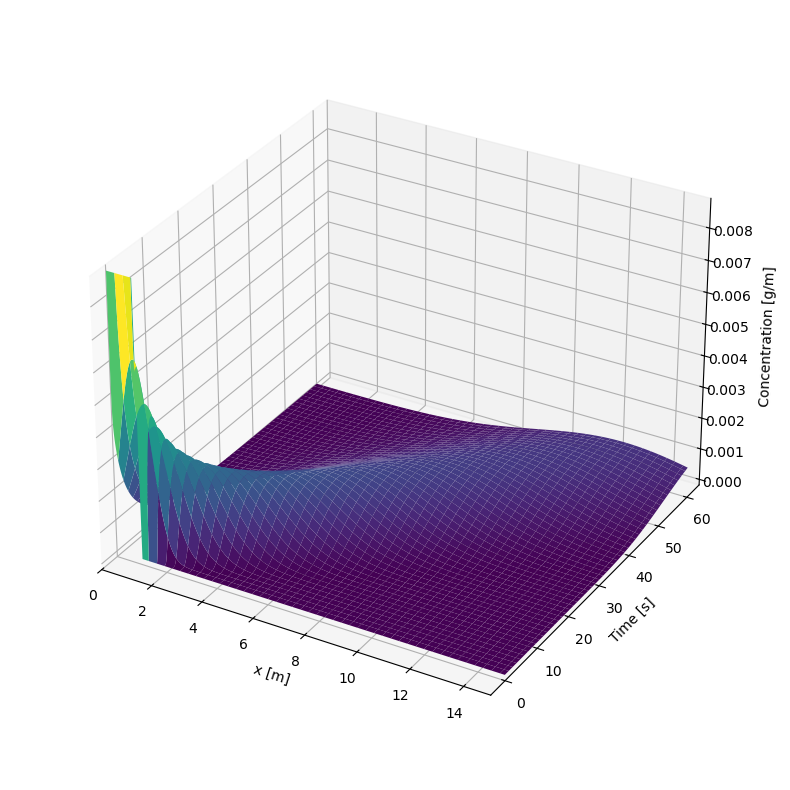

In [14]:
X, T = np.meshgrid(xx, t, indexing='ij')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, T, uu, cmap='viridis')

# Control the axis limits
ax.set_xlim([0, 15])

# Figure parameters
ax.set_xlabel('x [m]')
ax.set_ylabel('Time [s]')
ax.set_zlabel('Concentration [g/m]', labelpad=10)

# Avoid having the z axis label cut off
ax.set_box_aspect(None, zoom=0.9)

plt.show()

plotly

- This takes a long time to load and is very slow on my computer

In [6]:
# fig = go.Figure(data=[go.Surface(z=uu)])

# fig.update_layout(title='Concentration', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()